Import libraries

Taken from website:-
https://ourworldindata.org/coronavirus-source-data

In [34]:
import pandas as pd
import numpy as np

Read files

In [35]:
# load datasets
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96196,ZWE,Africa,Zimbabwe,2021-06-12,39852.0,164.0,97.714,1632.0,3.0,3.857,2681.302,11.034,6.574,109.803,0.202,0.260,1.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2637.0,579507.0,38.990,0.177,2527.0,0.170,0.039,25.9,tests performed,1103398.0,692180.0,411218.0,6544.0,5921.0,7.42,4.66,2.77,398.0,48.15,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
96197,ZWE,Africa,Zimbabwe,2021-06-13,39959.0,107.0,110.000,1632.0,0.0,3.714,2688.501,7.199,7.401,109.803,0.000,0.250,1.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1363.0,580870.0,39.082,0.092,2572.0,0.173,0.043,23.4,tests performed,1107058.0,693147.0,413911.0,3660.0,5564.0,7.45,4.66,2.78,374.0,48.15,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
96198,ZWE,Africa,Zimbabwe,2021-06-14,40077.0,118.0,119.857,1635.0,3.0,3.429,2696.441,7.939,8.064,110.005,0.202,0.231,1.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1108203.0,693568.0,414635.0,1145.0,4890.0,7.46,4.67,2.79,329.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96201 entries, 0 to 96200
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               96201 non-null  object 
 1   continent                              91667 non-null  object 
 2   location                               96201 non-null  object 
 3   date                                   96201 non-null  object 
 4   total_cases                            92966 non-null  float64
 5   new_cases                              92963 non-null  float64
 6   new_cases_smoothed                     91953 non-null  float64
 7   total_deaths                           82939 non-null  float64
 8   new_deaths                             83095 non-null  float64
 9   new_deaths_smoothed                    91953 non-null  float64
 10  total_cases_per_million                92470 non-null  float64
 11  ne

Convert date to number

In [37]:
import datetime 

date = df.date

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date_num'] = df['date'].dt.strftime('%d%m%Y')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,date_num
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,24022020
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,25022020
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,26022020
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,27022020
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,28022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96196,ZWE,Africa,Zimbabwe,2021-06-12,39852.0,164.0,97.714,1632.0,3.0,3.857,2681.302,11.034,6.574,109.803,0.202,0.260,1.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2637.0,579507.0,38.990,0.177,2527.0,0.170,0.039,25.9,tests performed,1103398.0,692180.0,411218.0,6544.0,5921.0,7.42,4.66,2.77,398.0,48.15,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,12062021
96197,ZWE,Africa,Zimbabwe,2021-06-13,39959.0,107.0,110.000,1632.0,0.0,3.714,2688.501,7.199,7.401,109.803,0.000,0.250,1.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1363.0,580870.0,39.082,0.092,2572.0,0.173,0.043,23.4,tests performed,1107058.0,693147.0,413911.0,3660.0,5564.0,7.45,4.66,2.78,374.0,48.15,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,13062021
96198,ZWE,Africa,Zimbabwe,2021-06-14,40077.0,118.0,119.857,1635.0,3.0,3.429,2696.441,7.939,8.064,110.005,0.202,0.231,1.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1108203.0,693568.0,414635.0,1145.0,4890.0,7.46,4.67,2.

Percent new deaths to new cases

In [38]:
df['per_death_to_case'] = df.new_cases / df.new_deaths
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,date_num,per_death_to_case
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,24022020,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,25022020,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,26022020,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,27022020,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,28022020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96196,ZWE,Africa,Zimbabwe,2021-06-12,39852.0,164.0,97.714,1632.0,3.0,3.857,2681.302,11.034,6.574,109.803,0.202,0.260,1.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2637.0,579507.0,38.990,0.177,2527.0,0.170,0.039,25.9,tests performed,1103398.0,692180.0,411218.0,6544.0,5921.0,7.42,4.66,2.77,398.0,48.15,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,12062021,54.666667
96197,ZWE,Africa,Zimbabwe,2021-06-13,39959.0,107.0,110.000,1632.0,0.0,3.714,2688.501,7.199,7.401,109.803,0.000,0.250,1.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1363.0,580870.0,39.082,0.092,2572.0,0.173,0.043,23.4,tests performed,1107058.0,693147.0,413911.0,3660.0,5564.0,7.45,4.66,2.78,374.0,48.15,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,13062021,inf
96198,ZWE,Africa,Zimbabwe,2021-06-14,40077.0,118.0,119.857,1635.0,3.0,3.429,2696.441,7.939,8.064,110.005,0.202,0.231,1.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Country

In [39]:
country = df['location'].to_list()

# using naive method to remove duplicated from list  
list_country = [] 
for i in country: 
    if i not in list_country: 
        list_country.append(i) 

list_country

['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe',
 'European Union',


In [40]:
print(len(list_country))

229


Graphical Representation

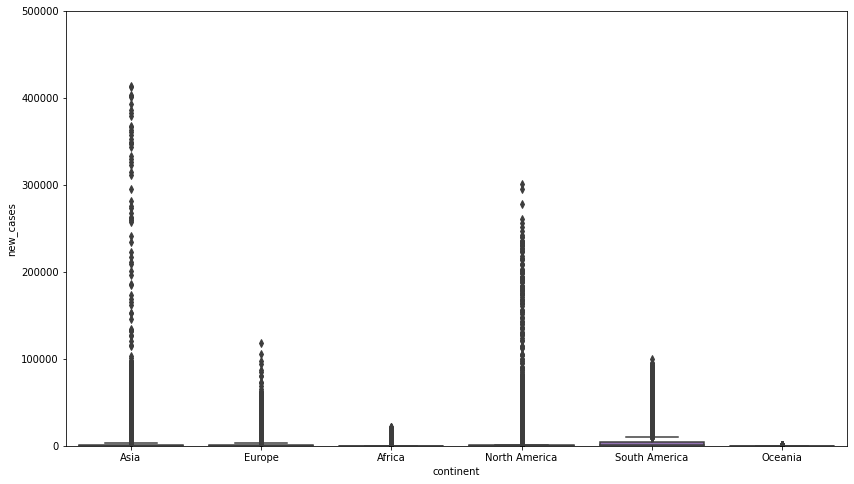

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

var = 'continent'
data = pd.concat([df['new_cases'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_cases", data=data)
fig.axis(ymin=0, ymax=500000);

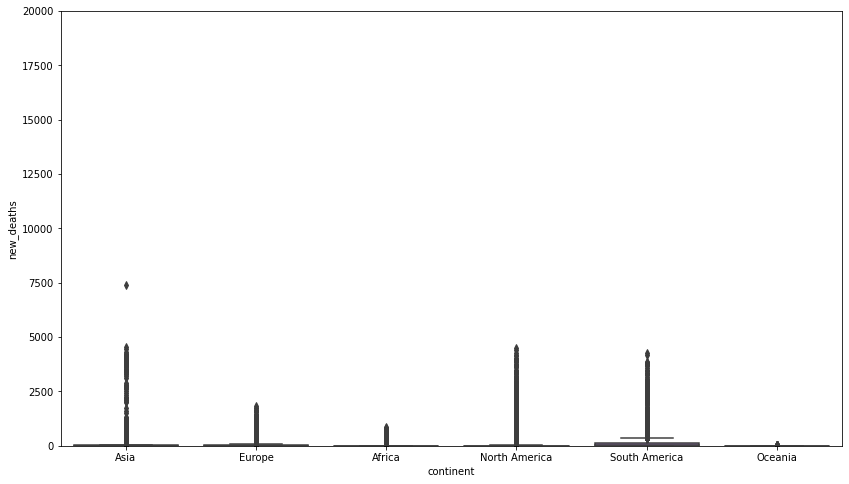

In [42]:
var = 'continent'
data = pd.concat([df['new_deaths'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_deaths", data=data)
fig.axis(ymin=0, ymax=20000);

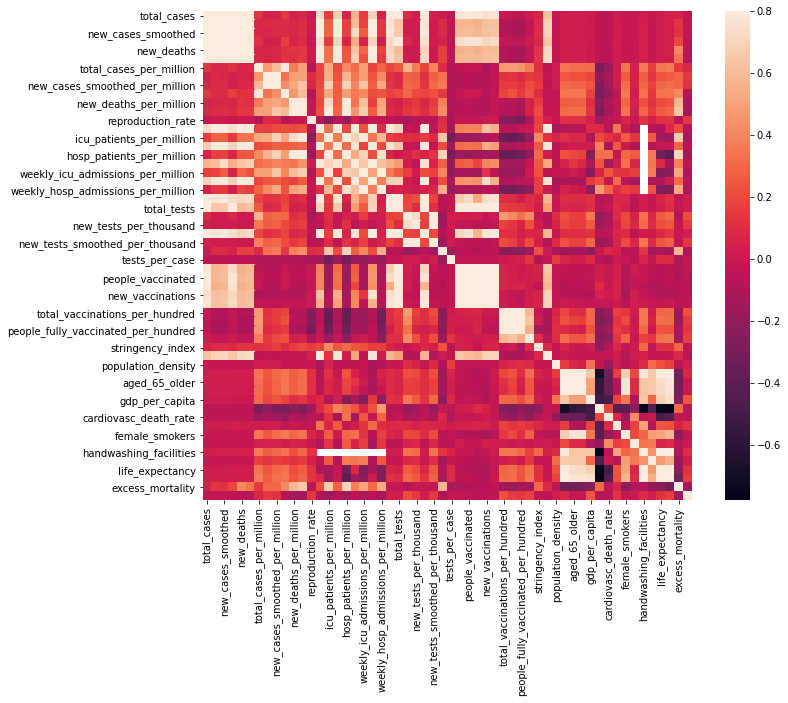

In [43]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

Countries

In [44]:
country = "United Kingdom"

include_uk = df[df['location'].values == country]
exclude_uk = df[df['location'].values != country]
uk_cov19 = include_uk
uk_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,date_num,per_death_to_case
90668,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.029,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,31012020,NaN
90669,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,01022020,NaN
90670,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,-5.15,02022020,NaN
90671,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,0.118,0.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,03022020,NaN
90672,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,0.118,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,04022020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91166,GBR,Europe,United Kingdom,2021-06-12,4574445.0,7552.0,6695.429,128160.0,12.0,8.714,67384.214,111.245,98.628,1887.871,0.177,0.128,1.37,169.0,2.489,1101.0,16.218,NaN,NaN,NaN,NaN,533809.0,190591296.0,2807.520,7.863,960178.0,14.144,0.007,143.4,tests performed,71343859.0,41551201.0,29792658.0,574511.0,478468.0,105.09,61.21,43.89,7048.0,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,12062021,629.333333
91167,GBR,Europe,United Kingdom,2021-06-13,4581779.0,7334.0,6996.714,128168.0,8.0,9.286,67492.248,108.034,103.066,1887.989,0.118,0.137,1.37,188.0,2.769,1136.0,16.734,NaN,NaN,NaN,NaN,1052222.0,191675702.0,2823.494,15.500,932568.0,13.737,0.008,133.3,tests performed,71672208.0,41698429.0,29973779.0,328349.0,470048.0,105.58,61.42,44.15,6924.0,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,13062021,916.750000
91

In [45]:
country = "Japan"

include_j = df[df['location'].values == country]
exclude_j = df[df['location'].values != country]
j_cov19 = include_j
j_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,date_num,per_death_to_case
44284,JPN,Asia,Japan,2020-01-22,2.0,NaN,NaN,NaN,NaN,NaN,0.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,NaN,22012020,NaN
44285,JPN,Asia,Japan,2020-01-23,2.0,0.0,NaN,NaN,NaN,NaN,0.016,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,NaN,23012020,NaN
44286,JPN,Asia,Japan,2020-01-24,2.0,0.0,NaN,NaN,NaN,NaN,0.016,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,NaN,24012020,NaN
44287,JPN,Asia,Japan,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.016,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,NaN,25012020,NaN
44288,JPN,Asia,Japan,2020-01-26,4.0,2.0,NaN,NaN,NaN,NaN,0.032,0.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,NaN,26012020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44791,JPN,Asia,Japan,2021-06-12,774240.0,1947.0,1898.143,13991.0,55.0,72.857,6121.614,15.394,15.008,110.621,0.435,0.576,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51297.0,14642140.0,115.770,0.406,64688.0,0.511,0.029,34.1,people tested,NaN,NaN,NaN,NaN,888661.0,NaN,NaN,NaN,7026.0,NaN,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,NaN,12062021,35.400000
44792,JPN,Asia,Japan,2021-06-13,775624.0,1384.0,1806.286,14023.0,32.0,70.286,6132.556,10.943,14.282,110.874,0.253,0.556,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25059.0,14667199.0,115.968,0.198,64487.0,0.510,0.028,35.7,people tested,23685319.0,17580587.0,6104732.0,NaN,918663.0,18.73,13.90,4.83,7264.0,NaN,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,NaN,13062021,43.250000
44793,JPN,Asia,Japan,2021-06-14,776565.0,941.0,1768.571,14083.0,60.0,68.143,6139.996,7.440,13.983,111.349,0.474,0.539,0.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60314.0,14727513.0,1

UK

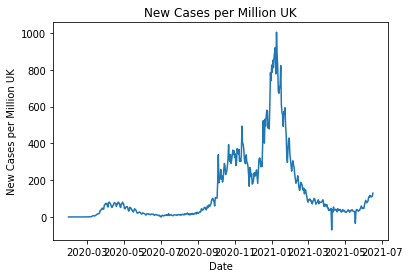

In [46]:
plt.plot(uk_cov19.date, uk_cov19.new_cases_per_million)
plt.xlabel('Date')
plt.ylabel('New Cases per Million UK')
plt.title('New Cases per Million UK')
plt.show()

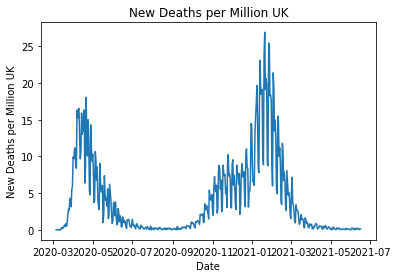

In [47]:
plt.plot(uk_cov19.date, uk_cov19.new_deaths_per_million)
plt.xlabel('Date')
plt.ylabel('New Deaths per Million UK')
plt.title('New Deaths per Million UK')
plt.show()

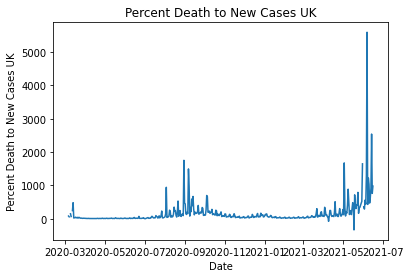

In [48]:
plt.plot(uk_cov19.date, uk_cov19.per_death_to_case)
plt.xlabel('Date')
plt.ylabel('Percent Death to New Cases UK')
plt.title('Percent Death to New Cases UK')
plt.show()

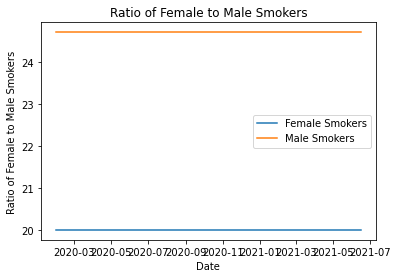

In [49]:
plt.plot(uk_cov19.date, uk_cov19.female_smokers)
plt.plot(uk_cov19.date, uk_cov19.male_smokers)
plt.legend(['Female Smokers', 'Male Smokers'])
plt.xlabel('Date')
plt.ylabel('Ratio of Female to Male Smokers')
plt.title('Ratio of Female to Male Smokers')
plt.show()

Japan

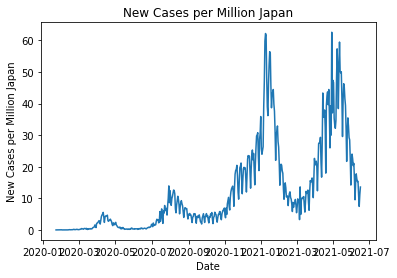

In [50]:
plt.plot(j_cov19.date, j_cov19.new_cases_per_million)
plt.xlabel('Date')
plt.ylabel('New Cases per Million Japan')
plt.title('New Cases per Million Japan')
plt.show()

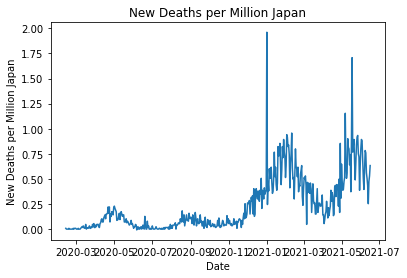

In [51]:
plt.plot(j_cov19.date, j_cov19.new_deaths_per_million)
plt.xlabel('Date')
plt.ylabel('New Deaths per Million Japan')
plt.title('New Deaths per Million Japan')
plt.show()

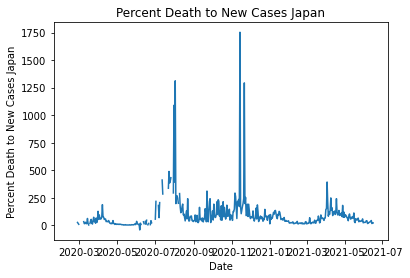

In [52]:
plt.plot(j_cov19.date, j_cov19.per_death_to_case)
plt.xlabel('Date')
plt.ylabel('Percent Death to New Cases Japan')
plt.title('Percent Death to New Cases Japan')
plt.show()

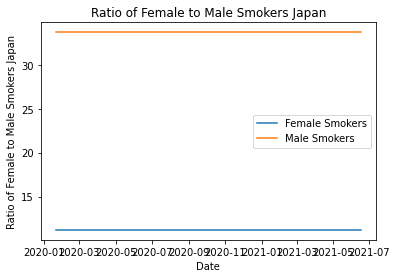

In [53]:
plt.plot(j_cov19.date, j_cov19.female_smokers)
plt.plot(j_cov19.date, j_cov19.male_smokers)
plt.legend(['Female Smokers', 'Male Smokers'])
plt.xlabel('Date')
plt.ylabel('Ratio of Female to Male Smokers Japan')
plt.title('Ratio of Female to Male Smokers Japan')
plt.show()

Comparisons

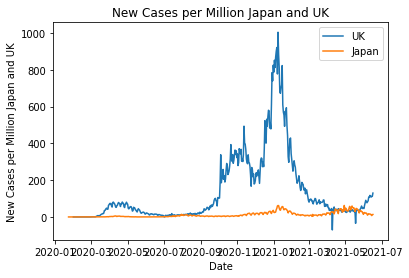

In [54]:
plt.plot(uk_cov19.date, uk_cov19.new_cases_per_million)
plt.plot(j_cov19.date, j_cov19.new_cases_per_million)
plt.legend(['UK', 'Japan'])
plt.xlabel('Date')
plt.ylabel('New Cases per Million Japan and UK')
plt.title('New Cases per Million Japan and UK')
plt.show()

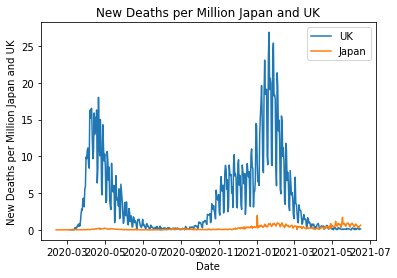

In [55]:
plt.plot(uk_cov19.date, uk_cov19.new_deaths_per_million)
plt.plot(j_cov19.date, j_cov19.new_deaths_per_million)
plt.legend(['UK', 'Japan'])
plt.xlabel('Date')
plt.ylabel('New Deaths per Million Japan and UK')
plt.title('New Deaths per Million Japan and UK')
plt.show()

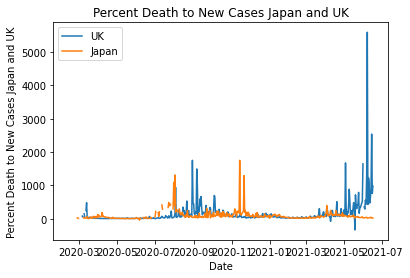

In [56]:
plt.plot(uk_cov19.date, uk_cov19.per_death_to_case)
plt.plot(j_cov19.date, j_cov19.per_death_to_case)
plt.legend(['UK', 'Japan'])
plt.xlabel('Date')
plt.ylabel('Percent Death to New Cases Japan and UK')
plt.title('Percent Death to New Cases Japan and UK')
plt.show()

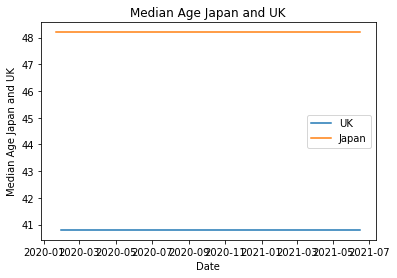

In [57]:
plt.plot(uk_cov19.date, uk_cov19.median_age)
plt.plot(j_cov19.date, j_cov19.median_age)
plt.legend(['UK', 'Japan'])
plt.xlabel('Date')
plt.ylabel('Median Age Japan and UK')
plt.title('Median Age Japan and UK')
plt.show()

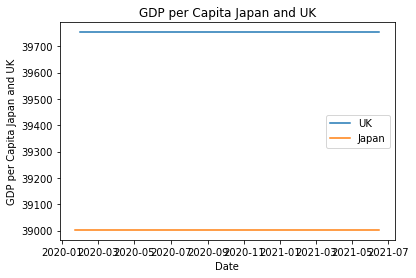

In [58]:
plt.plot(uk_cov19.date, uk_cov19.gdp_per_capita)
plt.plot(j_cov19.date, j_cov19.gdp_per_capita)
plt.legend(['UK', 'Japan'])
plt.xlabel('Date')
plt.ylabel('GDP per Capita Japan and UK')
plt.title('GDP per Capita Japan and UK')
plt.show()

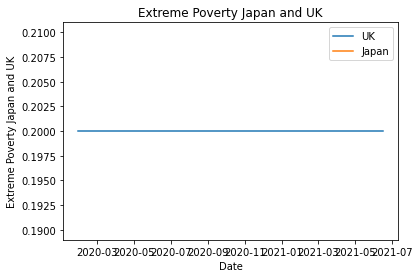

In [59]:
plt.plot(uk_cov19.date, uk_cov19.extreme_poverty)
plt.plot(j_cov19.date, j_cov19.extreme_poverty)
plt.legend(['UK', 'Japan'])
plt.xlabel('Date')
plt.ylabel('Extreme Poverty Japan and UK')
plt.title('Extreme Poverty Japan and UK')
plt.show()

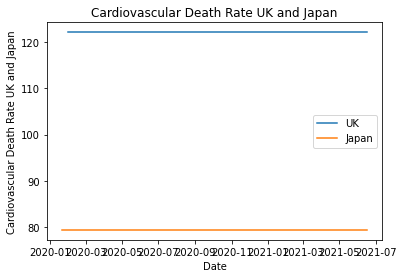

In [60]:
plt.plot(uk_cov19.date, uk_cov19.cardiovasc_death_rate)
plt.plot(j_cov19.date, j_cov19.cardiovasc_death_rate)
plt.legend(['UK', 'Japan'])
plt.xlabel('Date')
plt.ylabel('Cardiovascular Death Rate UK and Japan')
plt.title('Cardiovascular Death Rate UK and Japan')
plt.show()

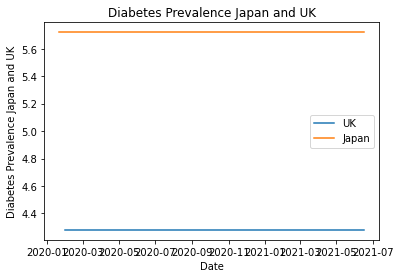

In [61]:
plt.plot(uk_cov19.date, uk_cov19.diabetes_prevalence)
plt.plot(j_cov19.date, j_cov19.diabetes_prevalence)
plt.legend(['UK', 'Japan'])
plt.xlabel('Date')
plt.ylabel('Diabetes Prevalence Japan and UK')
plt.title('Diabetes Prevalence Japan and UK')
plt.show()

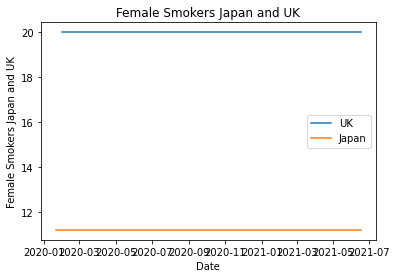

In [62]:
plt.plot(uk_cov19.date, uk_cov19.female_smokers)
plt.plot(j_cov19.date, j_cov19.female_smokers)
plt.legend(['UK', 'Japan'])
plt.xlabel('Date')
plt.ylabel('Female Smokers Japan and UK')
plt.title('Female Smokers Japan and UK')
plt.show()

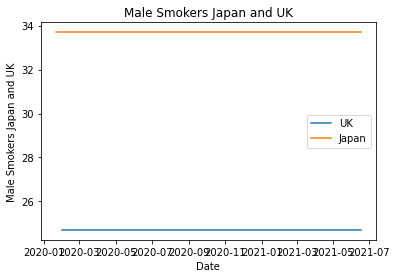

In [63]:
plt.plot(uk_cov19.date, uk_cov19.male_smokers)
plt.plot(j_cov19.date, j_cov19.male_smokers)
plt.legend(['UK', 'Japan'])
plt.xlabel('Date')
plt.ylabel('Male Smokers Japan and UK')
plt.title('Male Smokers Japan and UK')
plt.show()

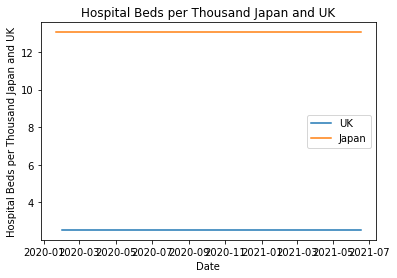

In [64]:
plt.plot(uk_cov19.date, uk_cov19.hospital_beds_per_thousand)
plt.plot(j_cov19.date, j_cov19.hospital_beds_per_thousand)
plt.legend(['UK', 'Japan'])
plt.xlabel('Date')
plt.ylabel('Hospital Beds per Thousand Japan and UK')
plt.title('Hospital Beds per Thousand Japan and UK')
plt.show()

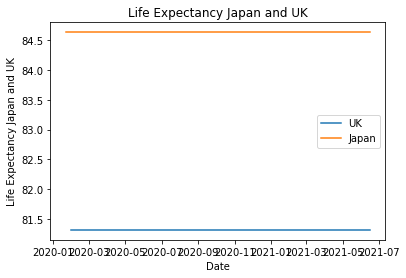

In [65]:
plt.plot(uk_cov19.date, uk_cov19.life_expectancy)
plt.plot(j_cov19.date, j_cov19.life_expectancy)
plt.legend(['UK', 'Japan'])
plt.xlabel('Date')
plt.ylabel('Life Expectancy Japan and UK')
plt.title('Life Expectancy Japan and UK')
plt.show()

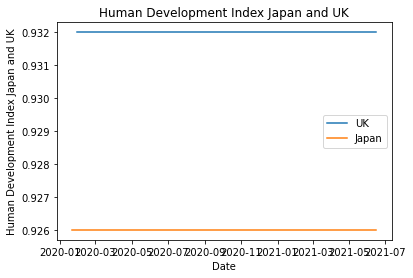

In [66]:
plt.plot(uk_cov19.date, uk_cov19.human_development_index)
plt.plot(j_cov19.date, us_cov19.human_development_index)
plt.legend(['UK', 'Japan'])
plt.xlabel('Date')
plt.ylabel('Human Development Index Japan and UK')
plt.title('Human Development Index Japan and UK')
plt.show()